In [1]:
from astropy.io import fits
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import matplotlib as mpl

# Exercise 1

In [5]:
y = np.array([[1, 2, 3, 4], [6, 7, 8, 9], [3, 4, 6, 1], [7, 2, 5, 8]])
z = np.array([[1, 7, 3, 8], [5, 3, 2, 8], [1, 6, 3, 8], [4, 5, 7, 2]])
matdot = np.dot(y,z)
print (matdot)
print (y*z)

[[ 30  51  44  56]
 [ 85 156 119 186]
 [ 33  74  42 106]
 [ 54 125  96 128]]
[[ 1 14  9 32]
 [30 21 16 72]
 [ 3 24 18  8]
 [28 10 35 16]]


# Exercise 2

In [6]:
import math
def fn2(x,k2):
    f = 1.0
    for k in range(1, k2):
        f += (-1)**k*x**(2*k)/math.factorial(2.*k)
    return f
pi = math.pi

k = 1
x = 9*pi/2
while fn2(x,k) != fn2(x, k+1):
    k = k+1
print("k = {}".format(k))

k = 40


# Exercise 3

In [2]:
from scipy import ndimage
image = fits.info('andromeda_rot.fits')
data = fits.getdata('andromeda_rot.fits')
blurred_data = ndimage.gaussian_filter(data,sigma=3)

Filename: andromeda_rot.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      53   (510, 340)   int16   


In [3]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

/Users/kiaharri/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


[None, None, None, None, None, None, None, None, None]

/Users/kiaharri/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


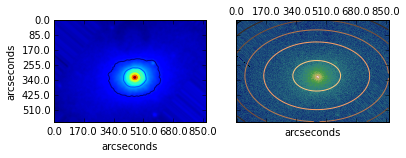

In [4]:
%matplotlib inline

def doubler(val, pos): # This function is called to reformat each tick with double it's original value.
    return str(1.7*val)  # notice that the function is of two variables, but we are only using the first one.

plt.subplot(1,2,1) # That's (number of rows of plots, number of cols, current active plot # to edit)
plt.imshow(blurred_data)
plt.ylabel('arcseconds')
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(doubler))
plt.xlabel('arcseconds')
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(doubler))
plt.contour(blurred_data)

plt2 = plt.subplot(1,2,2) # Setting the subplot equal to a variable allows us to explicitly reference it later
plt2.imshow(data)
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(doubler))
plt.xlabel('arcseconds')
plt2.matshow(data, cmap=plt.cm.gist_earth)
params = fitgaussian(data)
fit = gaussian(*params)

plt2.contour(fit(*np.indices(data.shape)), cmap=plt.cm.copper)
ax = plt.gca()
(height, x, y, width_x, width_y) = params
plt.setp(plt2.get_yticklabels(), visible=False) # hides the y-axis labels (since shared with the first plot)